Investigating that if clients with more kinds of products at the bank keep more deposit dollars.  

I am going to make a report that can go to the executives from both departments, as well as to the Chief Deposit Officer. For this purpose, it is sufficient to consider three broad product categories: deposits (checking and savings), loans (assets borrowed from the bank), and wealth management (stocks and bonds).

First; familiarity with the client and bank account data needed to address this hypothesis.  

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

acctdf = pd.read_csv("AccountTable.csv")
clientdf = pd.read_csv('ClientTable.csv')
bridgedf = pd.read_csv('ClientAcctFact.csv')

display(acctdf.head())
display(clientdf.head())
display(bridgedf.head())

print("Account table dimensions: ", acctdf.shape)
print("Client table dimensions: ", clientdf.shape)
print('Client-account bridge table dimensions: ', bridgedf.shape)

,AccountBalance,AccountID,AccountStatus,AccountType
0,25127.38,44363,open,D
1,25662.58,36801,open,D
2,3149.79,38963,open,D
3,870489.00,53464,open,L
4,714025.00,30787,open,L


,ClientID,Gender,Name,Region
0,1353110,M,Zeus Odetta,NE
1,168163,M,Eliza Aye,SW
2,7170,M,Claude Janissa,SE
3,747320,F,Coreena Renada,NE
4,754670,M,Laurance Kalishia,NE


,AccountID,ClientID
0,44363,1353110
1,36801,1353110
2,38963,1353110
3,53464,1353110
4,30787,1353110


Account table dimensions:  (4139, 4)
Client table dimensions:  (902, 4)
Client-account bridge table dimensions:  (4139, 2)


# Client Table 

### How many clients are in the bank

In [5]:
len(pd.unique(clientdf['ClientID']))

902

In [6]:
# also we could try nunique()
clientdf.nunique()

ClientID    902
Gender        2
Name        902
Region        4
dtype: int64

In [ ]:
# So, there are 902 clients in the bank, from 4 regions

### How many clients are in each region

In [12]:
clientdf.groupby(['Region']).size().reset_index(name='counts')

,Region,counts
0,NE,421
1,NW,115
2,SE,195
3,SW,171


### Create a bar plot of gender frequency

In [23]:
r = clientdf.groupby(['Gender']).size().reset_index(name='counts')
r

,Gender,counts
0,F,542
1,M,360


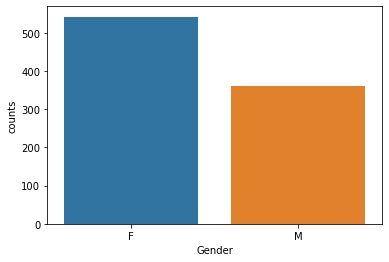

In [38]:
import seaborn as sns
ax = sns.barplot(x="Gender", y="counts", data=r)

# Account Table 

### What percentage of all accounts are {open, closed}

In [43]:
val, cnt = np.unique(acctdf['AccountStatus'], return_counts=True)
print(val)
print(cnt)

['closed' 'open' 'unknown']
[ 440 3476  223]


In [48]:
pdf = cnt / len(acctdf)

In [49]:
np.column_stack((val, pdf))

array([['closed', 0.1063058709833293],
       ['open', 0.8398163807683016],
       ['unknown', 0.05387774824836917]], dtype=object)

##### {'open': 84%, 'closed': 10.63%}

### What percentage of D accounts are closed

In [56]:
d_accounts = acctdf[acctdf['AccountType'] == 'D']

In [60]:
val_D, cnt_D = np.unique(d_accounts['AccountStatus'], return_counts=True)
print(val_D)
print(cnt_D)

['closed' 'open' 'unknown']
[ 263 2089  119]


In [58]:
pdf_D = cnt_D / len(d_accounts)

In [59]:
np.column_stack((val_D, pdf_D))

array([['closed', 0.10643464184540671],
       ['open', 0.8454067179279644],
       ['unknown', 0.04815864022662889]], dtype=object)

##### {closed_D:  10.64%}

# Combined Client and Account table

### Merge the Client and Account tables together

In [161]:
import pandas as pd
bridged = pd.merge(bridgedf, clientdf, on='ClientID', how='inner')
bridged

,AccountID,ClientID,Gender,Name,Region
0,44363,1353110,M,Zeus Odetta,NE
1,36801,1353110,M,Zeus Odetta,NE
2,38963,1353110,M,Zeus Odetta,NE
3,53464,1353110,M,Zeus Odetta,NE
4,30787,1353110,M,Zeus Odetta,NE
...,...,...,...,...,...
4134,27512,1214409,M,Rashaud Misbah,NE
4135,53984,1214409,M,Rashaud Misbah,NE
4136,91076,1214409,M,Rashaud Misbah,NE
4137,82041,1163216,M,Eryk Alanys,NE


In [271]:
Merged_df = pd.merge(bridged, acctdf, on='AccountID', how='inner')
Merged_df

,AccountID,ClientID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType
0,44363,1353110,M,Zeus Odetta,NE,25127.38,open,D
1,36801,1353110,M,Zeus Odetta,NE,25662.58,open,D
2,38963,1353110,M,Zeus Odetta,NE,3149.79,open,D
3,53464,1353110,M,Zeus Odetta,NE,870489.00,open,L
4,30787,1353110,M,Zeus Odetta,NE,714025.00,open,L
...,...,...,...,...,...,...,...,...
4134,27512,1214409,M,Rashaud Misbah,NE,31167.25,open,D
4135,53984,1214409,M,Rashaud Misbah,NE,26082.99,open,D
4136,91076,1214409,M,Rashaud Misbah,NE,7793.58,open,D
4137,82041,1163216,M,Eryk Alanys,NE,23565.76,open,D


### Created a new field in the merged table called 'ClientType' that tells the type of open accounts that each client has. For example, if a client currently has a D, L and W account, the ClientType would be 'DLW'. If a client only has an open D and L account then the ClientType would be 'DL'.

In [170]:
val_client_type, cnt_client_type = np.unique(Merged_df['AccountType'], return_counts=True)
print(val_client_type)
print(cnt_client_type)

['D' 'L' 'W']
[2471  774  894]


In [85]:
Merged_df.groupby('ClientID')['AccountType'].sum().reset_index(name='ClientType')

,ClientID,ClientType
0,784,LLLLWWWW
1,1291,W
2,7138,DDDDDDDDDDLLLWWWW
3,7170,DDDD
4,7475,DDWW
...,...,...
807,1812169,DD
808,1813135,DD
809,1813552,W
810,1819047,DDDDDDDDLLLLLLLLLLLWWWW


In [ ]:
xx = list(r['ClientType'])

listov = []
for i in xx:
    listov. append(''.join(list(set(i))))

In [167]:
r = Merged_df.pivot_table(values='AccountType', index='ClientID', aggfunc=(np.sum))

r['ClientType'] = listov 
print(r['ClientType'])

ClientID
784         WL
1291         W
7138       DLW
7170         D
7475        DW
          ... 
1812169      D
1813135      D
1813552      W
1819047    DLW
1823488    DLW
Name: ClientType, Length: 812, dtype: object


In [180]:
Merged_dff = pd.merge(r, Merged_df, on='ClientID', how='inner')
Cleaned_df = Merged_dff.drop('AccountType_x', axis = 1)
Cleaned_df

,ClientID,ClientType,AccountID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType_y
0,784,WL,7943,F,Golda Rebekka,NE,1129969.0,open,L
1,784,WL,27814,F,Golda Rebekka,NE,1119364.0,open,L
2,784,WL,42019,F,Golda Rebekka,NE,1113025.0,unknown,L
3,784,WL,39587,F,Golda Rebekka,NE,410881.0,open,L
4,784,WL,85480,F,Golda Rebekka,NE,1392400.0,open,W
...,...,...,...,...,...,...,...,...,...
4134,1823488,DLW,15725,M,Aari Lissete,SE,984064.0,open,W
4135,1823488,DLW,34391,M,Aari Lissete,SE,2007889.0,open,W
4136,1823488,DLW,26648,M,Aari Lissete,SE,1418481.0,open,W
4137,1823488,DLW,70822,M,Aari Lissete,SE,923521.0,open,W


### How many clients have open accounts of all three product types (D, L, and W)
#### With what probability do you think your answer is correct

In [213]:
listov = Cleaned_df[Cleaned_df['ClientType'] == 'DLW']
listov

,ClientID,ClientType,AccountID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType_y
9,7138,DLW,44179,M,Charlie Hollyann,NE,18216.68,open,D
10,7138,DLW,49499,M,Charlie Hollyann,NE,16361.82,open,D
11,7138,DLW,70114,M,Charlie Hollyann,NE,27356.92,open,D
12,7138,DLW,41924,M,Charlie Hollyann,NE,42030.08,unknown,D
13,7138,DLW,92926,M,Charlie Hollyann,NE,13892.17,open,D
...,...,...,...,...,...,...,...,...,...
4134,1823488,DLW,15725,M,Aari Lissete,SE,984064.00,open,W
4135,1823488,DLW,34391,M,Aari Lissete,SE,2007889.00,open,W
4136,1823488,DLW,26648,M,Aari Lissete,SE,1418481.00,open,W
4137,1823488,DLW,70822,M,Aari Lissete,SE,923521.00,open,W


In [216]:
rt = listov[listov['AccountType_y'] == 'D']       
rt[rt['AccountStatus'] == 'open']

,ClientID,ClientType,AccountID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType_y
9,7138,DLW,44179,M,Charlie Hollyann,NE,18216.68,open,D
10,7138,DLW,49499,M,Charlie Hollyann,NE,16361.82,open,D
11,7138,DLW,70114,M,Charlie Hollyann,NE,27356.92,open,D
13,7138,DLW,92926,M,Charlie Hollyann,NE,13892.17,open,D
14,7138,DLW,21301,M,Charlie Hollyann,NE,20891.90,open,D
...,...,...,...,...,...,...,...,...,...
4126,1823488,DLW,75455,M,Aari Lissete,SE,69830.63,open,D
4127,1823488,DLW,51318,M,Aari Lissete,SE,7437.54,open,D
4128,1823488,DLW,47487,M,Aari Lissete,SE,31522.26,open,D
4129,1823488,DLW,51339,M,Aari Lissete,SE,62105.64,open,D


In [217]:
len(rt.groupby('ClientID').size())

88

In [219]:
rr = listov[listov['AccountType_y'] == 'L']       
rr[rr['AccountStatus'] == 'open']

,ClientID,ClientType,AccountID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType_y
19,7138,DLW,46304,M,Charlie Hollyann,NE,1008016.0,open,L
20,7138,DLW,52965,M,Charlie Hollyann,NE,632025.0,open,L
21,7138,DLW,82629,M,Charlie Hollyann,NE,1876900.0,open,L
59,22149,DLW,96683,M,Sammie Tyrina,NE,1547536.0,open,L
61,22149,DLW,38460,M,Sammie Tyrina,NE,1315609.0,open,L
...,...,...,...,...,...,...,...,...,...
4109,1819047,DLW,20789,M,Chosen Beeta,SW,1201216.0,open,L
4112,1819047,DLW,46106,M,Chosen Beeta,SW,879844.0,open,L
4114,1819047,DLW,58523,M,Chosen Beeta,SW,617796.0,open,L
4131,1823488,DLW,53515,M,Aari Lissete,SE,1168561.0,open,L


In [220]:
len(rr.groupby('ClientID').size())

88

In [218]:
rg = listov[listov['AccountType_y'] == 'W']       
rg[rg['AccountStatus'] == 'open']

,ClientID,ClientType,AccountID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType_y
22,7138,DLW,73458,M,Charlie Hollyann,NE,1142761.0,open,W
23,7138,DLW,85381,M,Charlie Hollyann,NE,2030625.0,open,W
25,7138,DLW,3392,M,Charlie Hollyann,NE,484416.0,open,W
65,22149,DLW,15320,M,Sammie Tyrina,NE,1865956.0,open,W
66,22149,DLW,5115,M,Sammie Tyrina,NE,544644.0,open,W
...,...,...,...,...,...,...,...,...,...
4134,1823488,DLW,15725,M,Aari Lissete,SE,984064.0,open,W
4135,1823488,DLW,34391,M,Aari Lissete,SE,2007889.0,open,W
4136,1823488,DLW,26648,M,Aari Lissete,SE,1418481.0,open,W
4137,1823488,DLW,70822,M,Aari Lissete,SE,923521.0,open,W


In [221]:
len(rg.groupby('ClientID').size())

88

In [211]:
listov_open = listov[listov['AccountStatus'] == 'open']

In [199]:
listov_close = listov[listov['AccountStatus'] == 'closed']
listov_close

,ClientID,ClientType,AccountID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType_y
24,7138,DLW,91393,M,Charlie Hollyann,NE,102400.00,closed,W
60,22149,DLW,94510,M,Sammie Tyrina,NE,1192464.00,closed,L
63,22149,DLW,92315,M,Sammie Tyrina,NE,660969.00,closed,L
83,30708,DLW,38286,M,Wayman Vonceil,NE,31533.67,closed,D
86,30708,DLW,29046,M,Wayman Vonceil,NE,31286.35,closed,D
...,...,...,...,...,...,...,...,...,...
4110,1819047,DLW,78581,M,Chosen Beeta,SW,1279161.00,closed,L
4111,1819047,DLW,84497,M,Chosen Beeta,SW,1089936.00,closed,L
4113,1819047,DLW,76442,M,Chosen Beeta,SW,1739761.00,closed,L
4124,1823488,DLW,67820,M,Aari Lissete,SE,45206.85,closed,D


In [202]:
listov_unknown = listov[listov['AccountStatus'] == 'unknown']
listov_unknown

,ClientID,ClientType,AccountID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType_y
12,7138,DLW,41924,M,Charlie Hollyann,NE,42030.08,unknown,D
64,22149,DLW,73378,M,Sammie Tyrina,NE,158404.00,unknown,L
90,30708,DLW,78195,M,Wayman Vonceil,NE,1123600.00,unknown,L
95,30708,DLW,68442,M,Wayman Vonceil,NE,1394761.00,unknown,W
136,43030,DLW,56514,F,Lizzie Ollie,SW,705600.00,unknown,L
...,...,...,...,...,...,...,...,...,...
4099,1819047,DLW,56666,M,Chosen Beeta,SW,9170.60,unknown,D
4104,1819047,DLW,60840,M,Chosen Beeta,SW,994009.00,unknown,L
4115,1819047,DLW,51582,M,Chosen Beeta,SW,2105401.00,unknown,W
4121,1823488,DLW,98893,M,Aari Lissete,SE,28618.70,unknown,D


In [207]:
len(listov_close.groupby('ClientID').size())

75

In [205]:
len(listov_unknown.groupby('ClientID').size())

57

In [210]:
listov_open.groupby('ClientID').size()

ClientID
7138       15
22149      16
30708       8
43030      16
62708      14
           ..
1666190    13
1678805    11
1688353    13
1819047    16
1823488    16
Length: 88, dtype: int64

###### 88 Clients have 3 types of accounts (D, L and W) and have at least one open of these 3 types! 

### What is the average open W account balance for clients that have at least two open L accounts

In [227]:
listov_open = listov[listov['AccountStatus'] == 'open']
ct = listov_open[listov_open['AccountType_y'] == 'L']
ct

,ClientID,ClientType,AccountID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType_y
19,7138,DLW,46304,M,Charlie Hollyann,NE,1008016.0,open,L
20,7138,DLW,52965,M,Charlie Hollyann,NE,632025.0,open,L
21,7138,DLW,82629,M,Charlie Hollyann,NE,1876900.0,open,L
59,22149,DLW,96683,M,Sammie Tyrina,NE,1547536.0,open,L
61,22149,DLW,38460,M,Sammie Tyrina,NE,1315609.0,open,L
...,...,...,...,...,...,...,...,...,...
4109,1819047,DLW,20789,M,Chosen Beeta,SW,1201216.0,open,L
4112,1819047,DLW,46106,M,Chosen Beeta,SW,879844.0,open,L
4114,1819047,DLW,58523,M,Chosen Beeta,SW,617796.0,open,L
4131,1823488,DLW,53515,M,Aari Lissete,SE,1168561.0,open,L


In [260]:
rf = ct.pivot_table(values='AccountType_y', index='ClientID', aggfunc=(np.size))
rfy = rf>=2
rfy

,AccountType_y
ClientID,
7138,True
22149,True
30708,True
43030,True
62708,True
...,...
1665591,True
1666190,True
1678805,False


In [434]:
rfd = ct.pivot_table(values='AccountBalance', index='ClientID', aggfunc=(np.mean))
rfd

,AccountBalance
ClientID,
7138,1.172314e+06
22149,1.321182e+06
30708,1.437474e+06
43030,1.337038e+06
62708,8.477188e+05
...,...
1665591,1.311515e+06
1666190,5.112315e+05
1678805,1.592644e+06


In [444]:
import statistics
avg_data = statistics.mean(list(rfd['AccountBalance']))

In [443]:
std_data = statistics.pstdev(list(rfd['AccountBalance']))

In [446]:
avg_data + (std_data*1.645)/(len(rfd)**0.5)

1047374.2345894938

In [447]:
avg_data - (std_data*1.645)/(len(rfd)**0.5)

958402.421690109

In [412]:
Merged_dffd = pd.merge(rfd, rfy, on='ClientID', how='inner')
Merged_dffd[Merged_dffd['AccountType_y'] == True]

,AccountType,AccountType_y
ClientID,,
7138,3,True
22149,3,True
30708,3,True
43030,3,True
62708,3,True
...,...,...
1664930,3,True
1665591,3,True
1666190,3,True


##### based on the above calculations, there are 77 clients that have 2 or more L open accounts. Also, the average balance of their open L accounts calculated above.  

##### Also, I could say with 90% confidence say that the average balance of the customers lay between 958402.42 and 1047374.23

# Business 

- We hypothesize that clients with more product types also have more **deposit** dollars with us.  

In [413]:
rfds = Merged_df.pivot_table(values='AccountType', index='ClientID', aggfunc=(pd.Series.nunique))
rfds

,AccountType
ClientID,
784,2
1291,1
7138,3
7170,1
7475,2
...,...
1812169,1
1813135,1
1813552,1


In [414]:
Merged_B_Q = pd.merge(Merged_df, rfds, on='ClientID', how='inner')

Merged_B_Q

,AccountID,ClientID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType_x,AccountType_y
0,44363,1353110,M,Zeus Odetta,NE,25127.38,open,D,3
1,36801,1353110,M,Zeus Odetta,NE,25662.58,open,D,3
2,38963,1353110,M,Zeus Odetta,NE,3149.79,open,D,3
3,53464,1353110,M,Zeus Odetta,NE,870489.00,open,L,3
4,30787,1353110,M,Zeus Odetta,NE,714025.00,open,L,3
...,...,...,...,...,...,...,...,...,...
4134,27512,1214409,M,Rashaud Misbah,NE,31167.25,open,D,1
4135,53984,1214409,M,Rashaud Misbah,NE,26082.99,open,D,1
4136,91076,1214409,M,Rashaud Misbah,NE,7793.58,open,D,1
4137,82041,1163216,M,Eryk Alanys,NE,23565.76,open,D,1


In [415]:
merge_high = Merged_B_Q[Merged_B_Q['AccountType_y'] == 3]

In [416]:
merge_high_avg = merge_high.pivot_table(values='AccountBalance', index='ClientID', aggfunc=(np.mean))
merge_high_avg.mean()

AccountBalance    515701.863643
dtype: float64

In [417]:
aaa = list(merge_high_avg['AccountBalance'])

In [418]:
merge_medium = Merged_B_Q[Merged_B_Q['AccountType_y'] == 2]

In [419]:
merge_medium_avg = merge_medium.pivot_table(values='AccountBalance', index='ClientID', aggfunc=(np.mean))
merge_medium_avg.mean()

AccountBalance    495271.633177
dtype: float64

In [420]:
ddd = list(merge_medium_avg['AccountBalance'])

In [421]:
from random import sample

ddd = list(merge_medium_avg['AccountBalance'])
sampled_medium = sample(ddd, 88)
len(sampled_medium)

88

In [422]:
merge_low = Merged_B_Q[Merged_B_Q['AccountType_y'] == 1]
merge_low

,AccountID,ClientID,Gender,Name,Region,AccountBalance,AccountStatus,AccountType_x,AccountType_y
19,2532,7170,M,Claude Janissa,SE,27551.15,open,D,1
20,30625,7170,M,Claude Janissa,SE,38256.43,open,D,1
21,36184,7170,M,Claude Janissa,SE,11107.74,open,D,1
22,51645,7170,M,Claude Janissa,SE,13174.91,open,D,1
23,5113,747320,F,Coreena Renada,NE,82348.24,open,D,1
...,...,...,...,...,...,...,...,...,...
4134,27512,1214409,M,Rashaud Misbah,NE,31167.25,open,D,1
4135,53984,1214409,M,Rashaud Misbah,NE,26082.99,open,D,1
4136,91076,1214409,M,Rashaud Misbah,NE,7793.58,open,D,1
4137,82041,1163216,M,Eryk Alanys,NE,23565.76,open,D,1


In [423]:
merge_low_avg = merge_low.pivot_table(values='AccountBalance', index='ClientID', aggfunc=(np.mean))
merge_low_avg.mean()

AccountBalance    437202.291514
dtype: float64

In [424]:
merge_low_avg

,AccountBalance
ClientID,
1291,8.353960e+05
7170,2.252256e+04
8052,9.643240e+05
12166,1.069644e+06
21104,1.240996e+06
...,...
1808717,3.118012e+04
1809042,2.579206e+04
1812169,3.143944e+04


In [431]:
t, p = ttest_ind(sampled_mix, sampled_low)
print(p)

0.0365880390438456


Null hypothesis H0: Clients with more product types DO NOT have more deposit dollars with the Bank

Alternative hypothesis (Ha): Clients with more product types also have more deposit dollars with the Bank
    
For the high number of product types: I assumed with 2 or 3 types of accounts D, L, W and for the low, I assumed 1 type

So, I found the p-value of these 2 dataframes:

With 95% Confidence (as the p-value is 0.036) I would say that as the number of account types grows, the average Account Balance increases So that, we can reject the null hypothesis, and this number of account types affects the Average Balance of the client's account